# 실습을 통해 Kernel SVM 모델 이해하기

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer # 기저함수 생성을 위해 필요
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib.pyplot as plt

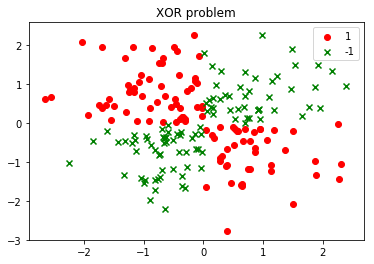

In [4]:
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, -1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='o', label='1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='g', marker='x', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

In [5]:
svc = SVC(kernel="linear").fit(X, y)

In [6]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.3)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='r', marker='o', label='+1')
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='g', marker='x', label='-1')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

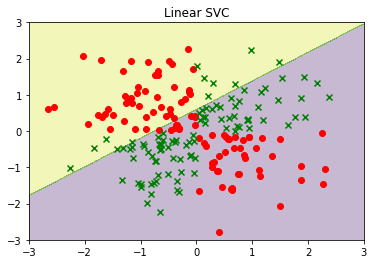

In [7]:
plot_xor(X, y, svc, "Linear SVC")

기저함수 = X1^2, root(2) * X1 * X2, X2^2

In [9]:
def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

In [10]:
x = np.arange(8).reshape(4, 2)
FunctionTransformer(basis).fit_transform(x)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

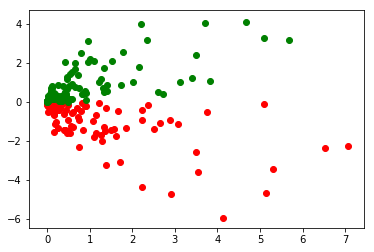

In [11]:
X_xor = FunctionTransformer(basis).fit_transform(X)
plt.scatter(X_xor[y== 1, 0], X_xor[y== 1, 1], c="r")
plt.scatter(X_xor[y==-1, 0], X_xor[y==-1, 1], c="g")
plt.show()

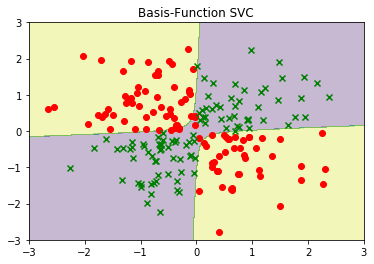

In [12]:
basismodel = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))]).fit(X, y)
plot_xor(X, y, basismodel, "Basis-Function SVC")

## 핵심 Kernel

1) 다항 kernel

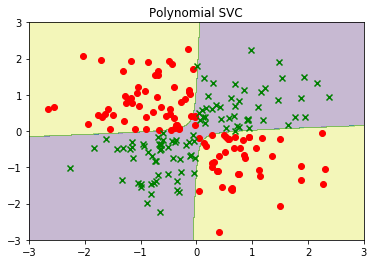

In [13]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X, y)
plot_xor(X, y, polysvc, "Polynomial SVC")

2) 가우시안 kernel

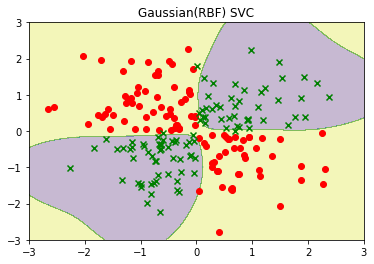

In [14]:
rbfsvc = SVC(kernel="rbf", gamma=1).fit(X, y)
plot_xor(X, y, rbfsvc, "Gaussian(RBF) SVC")

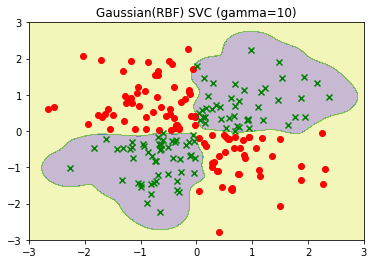

In [15]:
rbfsvc_10 = SVC(kernel="rbf", gamma=10).fit(X, y)
plot_xor(X, y, rbfsvc_10, "Gaussian(RBF) SVC (gamma=10)")

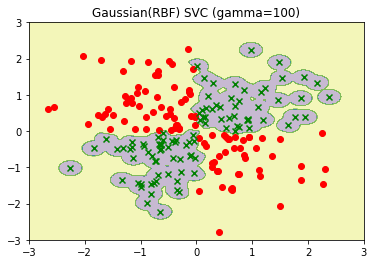

In [16]:
rbfsvc_100 = SVC(kernel="rbf", gamma=100).fit(X, y)
plot_xor(X, y, rbfsvc_100, "Gaussian(RBF) SVC (gamma=100)")

3) 시그모이드 Kernel

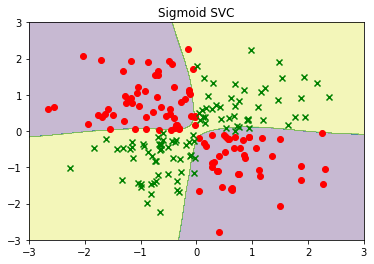

In [17]:
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X, y)
plot_xor(X, y, sigmoidsvc, "Sigmoid SVC")